## **Hierachical Clustering**


In [8]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


# **Data Preprocessing**

In [3]:
# Dropping unnecessary index column 'Unnamed:0'
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()


,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [4]:

categorical_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level',
                    'Alcohol_Consumption', 'Smoking_Status']

df.drop(categorical_cols, axis=1, inplace=True)
df.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,1538,0,1
1,48,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,2653,0,1
2,34,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,1684,1,0
3,62,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,3796,1,0
4,27,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,3161,0,0


In [10]:
# Convert all columns to numeric (should already be, but just in case)
df = df.apply(pd.to_numeric, errors='coerce')

In [12]:
# Fill any missing values with the column mean (if any)
df = df.fillna(df.mean())

In [13]:
# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

 **Hierarchical Clustering Implemnetation**

In [27]:
# HC class (from your previous code)
class HC:
    # Class initialization
    def __init__(self, linkage_type='complete'): # here we define the linkage
        self.linkage_type = linkage_type

        #Linkage: it determines of how the distance bwign calculated between clusters, we are using 'complete'
        # 'complete' linkage is the maximum distance betweem the data points in two clsuters

    # Euclidean Distance Function
    def euclidean_distance(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2))


    # Calculating the minimum distance between non-diagonal values in Distance matrix
    # Tells you about the closest clusters and should be merged
    def argmin(self, D):
        min_val = float('inf')
        minx, miny = 0, 0
        for i in range(D.shape[0]):
            for j in range(D.shape[1]):
                if i == j:  # diagonal value(do not include)
                    continue
                if D[i, j] < min_val:
                    min_val = D[i, j]
                    minx, miny = i, j
        return min_val, minx, miny  #return the minimum value

    # Calcualting Distance matrix (between clusters)
    def cluster_distance(self, cluster_members, X):
        nClusters = len(cluster_members)
        keys = list(cluster_members.keys())
        Distance = np.zeros((nClusters, nClusters))
        for i in range(nClusters):
            for j in range(nClusters):
                if i == j: #not including diagonal values
                    continue
                ith_elems = cluster_members[keys[i]]
                jth_elems = cluster_members[keys[j]]
                distances = [self.euclidean_distance(X[p1], X[p2])
                            for p1 in ith_elems for p2 in jth_elems]
                #Depends on Linkage type ('complete' or 'single')
                if self.linkage_type == 'complete':
                    Distance[i, j] = np.max(distances)
                elif self.linkage_type == 'single':
                    Distance[i, j] = np.min(distances)
        return Distance

    # Building Hierarchical Clustering
    def fit(self, X):
        self.X = X
        self.nSamples = X.shape[0]
        # initialising each point in the sample as a cluster
        cluster_members = {i: [i] for i in range(self.nSamples)}
        Z = np.zeros((self.nSamples - 1, 4))

        for i in range(self.nSamples - 1):
            D = self.cluster_distance(cluster_members, X)
            dist, tmpx, tmpy = self.argmin(D)
            keys = list(cluster_members.keys())
            x, y = keys[tmpx], keys[tmpy]
            #indices of merged clusters
            Z[i, 0] = x
            Z[i, 1] = y
            Z[i, 2] = dist  #distance between merged clusters
            Z[i, 3] = len(cluster_members[x]) + len(cluster_members[y]) # no of original samples in the new cluster
            cluster_members[i + self.nSamples] = cluster_members[x] + cluster_members[y]
            del cluster_members[x]
            del cluster_members[y]

        self.Z = Z
        return self

    #Predict method (assigning cluster labels)
    def predict(self, n_clusters=3):
        cluster_members = {i: [i] for i in range(self.nSamples)}
        for i in range(self.nSamples - n_clusters):
            x, y = int(self.Z[i, 0]), int(self.Z[i, 1])
            cluster_members[self.nSamples + i] = cluster_members[x] + cluster_members[y]
            del cluster_members[x]
            del cluster_members[y]

        labels = np.zeros(self.nSamples)
        for i, key in enumerate(cluster_members):
            for sample in cluster_members[key]:
                labels[sample] = i
        return labels

In [15]:
#Dendrogram Function fro plot
def plot_dendrogram(Z, nSamples, n_clusters=4):
    # Tracking cluster positions
    #Initially every sample is a cluster
    cluster_pos = {i: (i, 0) for i in range(nSamples)}
    lines = []

    # Find the distance threshold for n_clusters
    #Threshold: threshold is the height at which you would cut the dendrogram to get the desired number of clusters.
    threshold = 0
    for i in range(Z.shape[0] - n_clusters + 1):
        threshold = max(threshold, Z[i, 2])

    #Building the dendrogram structure
    for i in range(Z.shape[0]):
        c1, c2, dist, _ = Z[i]
        c1, c2 = int(c1), int(c2)
        x1, y1 = cluster_pos[c1]
        x2, y2 = cluster_pos[c2]
        # New cluster position at average x and height = distance
        new_x = (x1 + x2) / 2
        new_y = dist
        # Adding lines: vertical to merge point, horizontal to connect clusters
        lines.append((x1, y1, x1, new_y))  # Vertical line for c1
        lines.append((x2, y2, x2, new_y))  # Vertical line for c2
        lines.append((x1, new_y, x2, new_y))  # Horizontal line
        # Update cluster position
        cluster_pos[nSamples + i] = (new_x, new_y)

   # Plotting the dendrogram
    plt.figure(figsize=(12, 6))
    cmap = plt.get_cmap('viridis')
    max_dist = np.max(Z[:, 2]) or 1
    for x1, y1, x2, y2 in lines:
        color = cmap(y2 / max_dist)
        plt.plot([x1, x2], [y1, y2], color=color, linestyle='-')

    #To draw the horizontal partition line for n_clusters
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Cut for {n_clusters} clusters')
    plt.legend()

    #Axis labels
    plt.title("Dendrogram of Stock Data")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.xticks(np.arange(nSamples), np.arange(nSamples), rotation=90)
    plt.show()

In [18]:
# Calling the hierarchical clustering
X_small = X[:30]  # Trying with 30 samples (to avoid the clutter)
hc = HC(linkage_type='complete')
hc.fit(X_small)

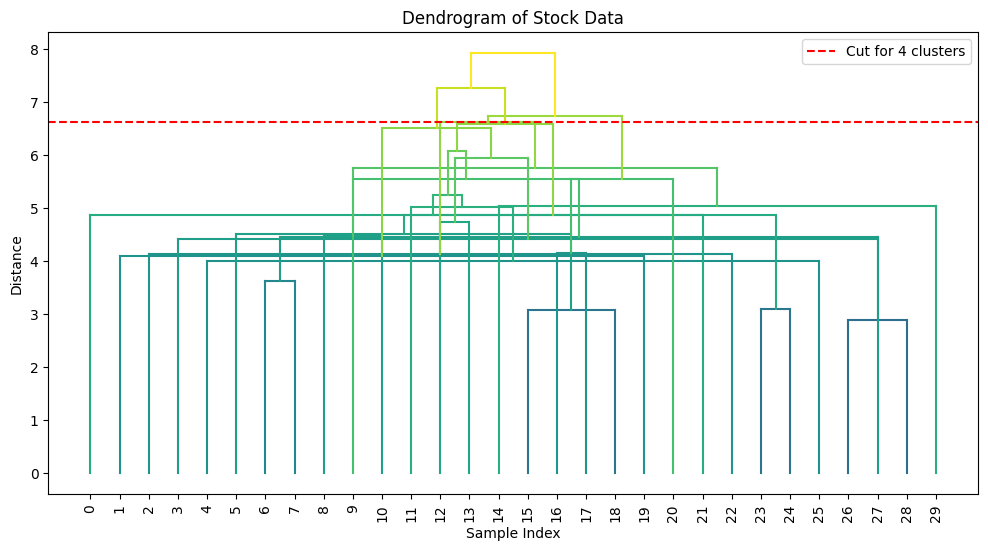

In [19]:
# Calling the plot fucntion for dendrogram
plot_dendrogram(hc.Z, hc.nSamples, n_clusters=4)

Obervation:

The Dendrogram shows the hierarchical clutering of first 30 samples.

Each vertical line is a merge between the clusters.

The dashed line cuts the dendrogram into 4 clusters at 6.7 mark. And, each vertical line crossine this line represents a clsuster merge.


In [20]:
# Predicting clusters (e.g., 5 clusters for diversity)
n_clusters = 5
labels = hc.predict(n_clusters)

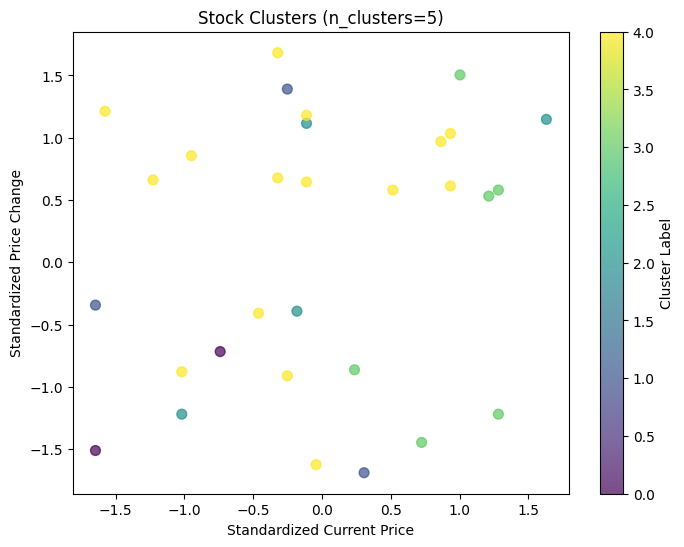

In [26]:
# Plottting clusters (using first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_small[:, 0], X_small[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title(f"Stock Clusters (n_clusters={n_clusters})")
plt.xlabel("Standardized Current Price")
plt.ylabel("Standardized Price Change")
plt.show()

Observation:

This plot is the visual representation of the grouped data of the algorithm of 2 features.